In [45]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

## Exploring and Cleaning Data

In [8]:
store_data = pd.read_csv('../data/Sample - Superstore.csv', encoding='cp1252')

In [40]:
store_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [34]:
store_data.shape

(9994, 21)

In [39]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   object        
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [13]:
store_data['Postal Code'] = store_data['Postal Code'].astype(str)

In [38]:
store_data['Order Date'] = pd.to_datetime(store_data['Order Date'])
store_data['Ship Date'] = pd.to_datetime(store_data['Ship Date'])

In [29]:
store_data.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [36]:
store_data.drop_duplicates(inplace=True)
store_data.shape

(9994, 21)

In [69]:
store_data['Ship Mode'].value_counts()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

In [80]:
print(
    store_data['Category'].value_counts(),
    '---------------',
    store_data['Sub-Category'].value_counts(),
    sep='\n'
)

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64
---------------
Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64


In [82]:
print(
    store_data['Country'].value_counts(),
    '---------------',
    store_data['Region'].value_counts(),
    '---------------',
    store_data['City'].value_counts(),
    sep='\n'
)

Country
United States    9994
Name: count, dtype: int64
---------------
Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64
---------------
City
New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: count, Length: 531, dtype: int64


In [72]:
store_data['Segment'].value_counts()

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

In [85]:
store_data.drop(columns=['Row ID','Order Date','Ship Date']).describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


### Outliners

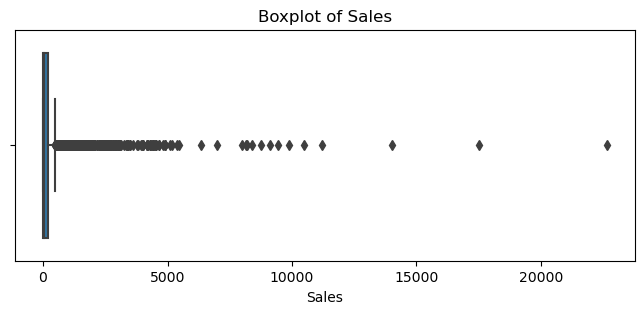

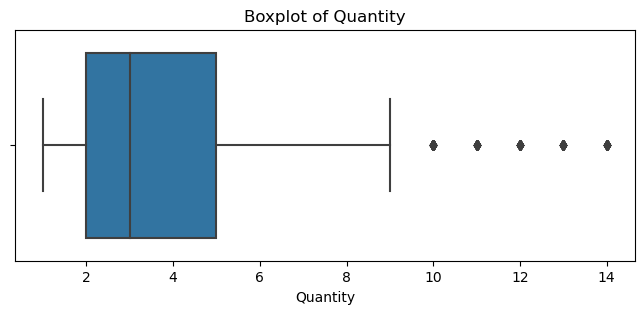

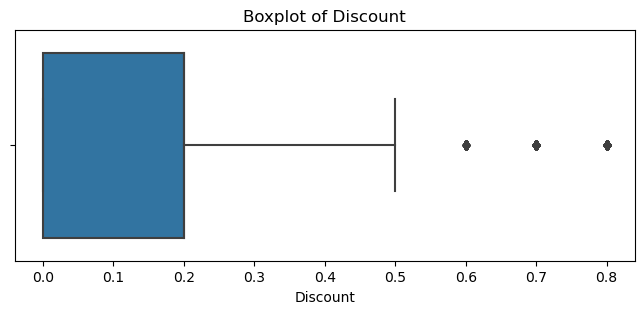

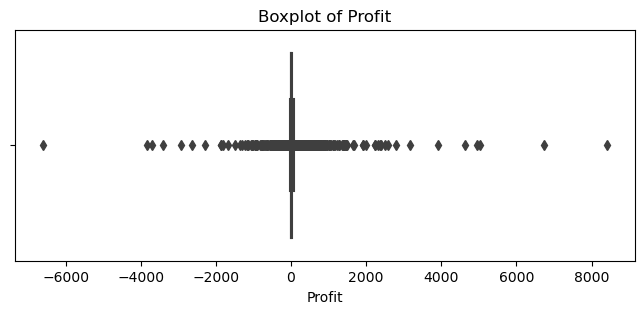

In [55]:
num_cols = ['Sales', 'Quantity', 'Discount', 'Profit']
for col in num_cols:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=store_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [67]:
negative_profit = store_data[store_data['Profit'] < 0]
print(f"Amount of negative orders: {len(negative_profit)}")
print(f"Percentage of negative orders: {(len(negative_profit)/len(store_data))*100:.1f}%")

Amount of negative orders: 1871
Percentage of negative orders: 18.7%


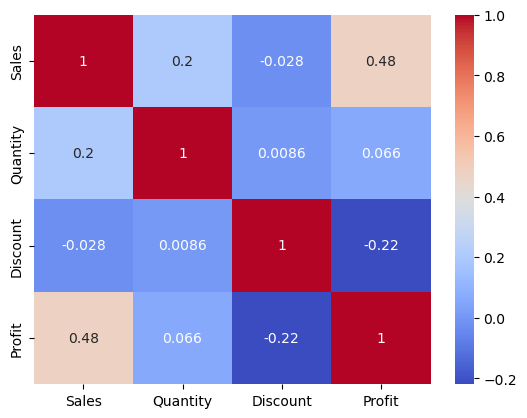

In [56]:
sns.heatmap(store_data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.show()